파이썬 머신러닝 완벽 가이드 ch8. 1 ~ 3 pg. 466 ~ 486

---

# CHAPTER 08 텍스트 분석

### NPL vs 텍스트 분석
1. NPL
- 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술이 발전
- 텍스트 분석을 향상하게 하는 기반 기술이라고 할 수 있다.
2. 텍스트 마이닝(텍스트 분석)
- 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 더 중덤을 두고 기술이 발전
- 모델을 수립하고 정보를 추출해 분석 작업을 수행한다.
  - 텍스트 분류
  - 감성 분석
  - 텍스트 요약
  - 텍스트 군집화

## 01 텍스트 분석 이해

비정형 데이터인 텍스트 분석

지금까지 ML 모델은 주어진 정형 데이터 기반에서 모델을 수립하고 예측을 수행했다.

머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에 텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가 하는 거시 매우 중요한 요소이다.

`피처 벡터화`, `피처 추출`
- 텍스트를 word 기반의 다수 피처로 추출
- -> 이 피처에 단어 빈도수와 같은 숫자 값을 부여
- -> 텍스트는 단어 조합인 벡터값으로 표현

텍스트를 피처 벡터화해서 변환하는 방법 : BOW(Bag of words), Wor2Vec


### 텍스트 분석 수행 프로세스

1. 텍스트 전처리
- 클렌징, 대/소문자 변경, 특수문자 삭제, 토큰화, stop word 제거, 어근 추출 등
2.피처 벡터화/추출
3. ML 모델 수립 및 학습/예측/평가

### 파이썬 기반의 NLP, 텍스트 분석 패키지

- NLTK
- Gensim
- SpaCy

## 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

- 클렌징
- 토큰화
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization

### 클랜징

텍스트 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업

- 예 : HTML 태그나 특정 기호

### 텍스트 토큰화

#### 문장 토큰화
- 문장의 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
- 정규 표현식에 따른 문장 토큰화도 가능하다.
- NLTK의 sent_tokenize를 이용해보자

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- sent_tokenize()가 반환하는 것은 각각의 문장으로 구성된 list 객체
- 3개의 문장으로 된 문자열을 갖고 있다.

#### 단어 토큰화

- 문장을 단어로 토큰화
- 기본적으로 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리하지만 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있다.
- Bag of Word 와 같이 단어의 순서가 중요하지 않은 경우, 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분하다.
- 문장 토큰화는 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용한다.
- NLTK의 word_tokenize() 사용

In [2]:
from nltk import word_tokenize
sentence = "The Matrix is everywhere its all around us, hear even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'hear', 'even', 'in', 'this', 'room', '.']


In [3]:
# sent_tokenize & word_tokenize 조합
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 문장별로 단어 토큰화 적용
- 먼저 문장으로 나누고, 개별 문장을 다시 단어로 토큰화 하는 함수 생성
- 3개 문장을 문장별로 먼저 토큰화했으므로 work_tokens 변수는 3개의 리스트 객체를 내포하는 리스트이다. 개별 리스트 객체는 각각 문장별로 토큰화된 단어를 요소로 가지고 있다.

문장을 단어별로 하나씩 토큰화 할 경우, 문맥적인 의미는 무시될 수 밖에 없다.


-> `n-gram` 도입
- 연속된 n개의 단어를 하나의 토큰화 단위로 분리ㅎ 내는 것
- n개 단어 크기 윈도우를 만들어 문자의 처움부터 오른쪽으로 움직이면서 토큰화 수행

### 스톱 워드 제거

- `스톱 워드(Stop word)` : 분서게 큰 의미가 없는 단어
- 문법적인 특성으로 인해 빈번하게 텍스트에 나타나므로 사전에 제거하지 않으면 오히려 중요한 단어로 인지될 수 있다.
- 언어별로 스톱 워드가 목록화 되어있다.
 - NLTK 의 stopwords


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


- 영어의 경우 스톱 워드는 179개

In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


- 스톱 워드 제거

### Stemming과 Lemmatization

문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것

- 두 기능 모두 목적(원형 단어 찾기)은 유사하지만, Lemmatization이 Stemming 보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다.

- Stemming
 - 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용
 - 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출

- Lemmatization은 품ㅅ와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾는다.

- 따라서Lemmatization이 더 오래 걸린다.

- NLTK는 다양한 Stemmer 제공
- Lemmatization을 위해서는 WordNetLemmatizer를 제공
 - NLTK의 `LancasterStemmer`(Stemmer) : 진행형, 3인칭 단수, 과거형에 따른 동사, 그리고 비교, 최사에 따른 형용사의 변화에 따라 Stemming은 더 단순하게 원형 단어를 찾는다.
 - LAncasterStemmer()와 같이 필요한 객체를 생성한 뒤, 이 객체의 stem('단어') 메서드를 호출하면 원하는 단어의 Stemming이 가능하다.

In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- work : 제대로 인식
- amuse : 인식 x -> amus를 원형 단어로 인식
- happy, fancy : 비교형, 최상급형으로 변형된 단어의 정확한 원형을 찾지 못하고 원형 단어에서 철자가 다른 어근 단어로 인식

WordNetLemmatizer를 이용한 Lemmatization 수행
- 단어의 품사 입력
- lemmatize()의 파라미터로 동사의 경우'v', 형용사의 경우 'a'를 입력

In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


- Stemmer 보다 정확하게 원형 단어를 추출한다.

## 03 Bag of Words - BOW

문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

1. 문장에 있는 모든 단어에서 중복 제거 -> 각 단어를 칼럼 형태로 나열 -> 각 단어에 고유의 인덱스 부여

2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어(단어 인덱스)에 기재

- 장점
 - 쉽고 빠른 구축
 - 단순히 단어의 발생 횟수에 기반하고 있지만, 문서의 특징 잘 나타냄 -> 활용도 높다.
- 단점
 - 문맥 의미 반영 부족 : 단어의 순서 고려x, 보완 위해 n_gram 기법 활용 가능하지만 제한적.
 - 희소 행렬 문제(희소성, 희소 행렬) : 희소 행렬의 데이터 세트가 만들어지기 쉽다.
 > 많은 문서에서 단어 추출 -> 많은 단어가 칼럼으로 -> 하나의 문서에 있는 단어는 극히 일부분 -> 대부분의 데이터는 0 값으로 채워짐
 > - `희소행렬` : 대규모의 칼럼으로 구서된 행렬에서 대부분의 값이 0으로 채워지는 행렬 ( 반대는 `밀집 행렬`)
 > - 일반적으로 ML 알고리즘의 수행 시간과 예측 성능 떨어뜨린다. -> 특별한 기법이 마련되어 있다.

### BOW 피처 벡터화

`피처 벡터화` : 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환
- 예
 - 각 문서에서 텍스트를 단어로 추출해 피처로 할당
 - 각 단어의 발생 빈도와 같은 값을 이 피처에 값으로 부여
 - 각 문서를 이 단어 치퍼츼 발생 빈도 값으로 구성된 벡터로 만드는 기법
- 기존 텍스트 데이터를 또 다른 형태의 피ㅓ의 조합으로 변경하기 때문에 넓은 범위의 피처 추출에 포함된다.

BOW 모델에서 피처 벡터화
- 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
- 예 : M개 문서, N개 단어 -> MxN 행렬 구성
- 두 가지 방식
 - `카운트 벡터화`
 >- 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수(Count)를 부여하는 경우
 >- 카운트 값이 높을수록 중요한 단어로 인식
 >- 언어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값으로 부여
 - -> 해결 : `TF-IDF 벡터화`
 >- 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값 부여
 >- 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능 보장

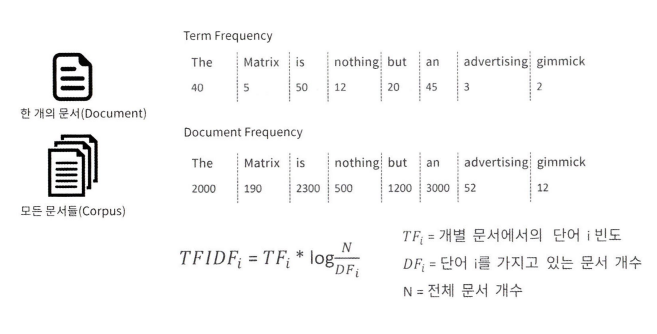

### 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

사이킷런의 CountVectorizer 클래스
- 카운트 기반의 벡터화를 구현한 클래스
- 단지 피처 벡터화만 수행하지 않으며 텍스트 전처리도 함께 수행
- fit(), transform()을 통해 피처 벡터화된 객체 반환

- 입력 파라미터
 - max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
 - min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
 - max_features : 추출하는 피처의 개수를 제한. 정수로 값 지정.
 - stop_words : 'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
 - n_gram_range : Bag of Words 모델의 단어 순서를 어느 정도 보장하기 위한 n_gram 범위 설정. 튜플 형태로 (범위 최솟값, 범위 최댓값) 지정
 - analyzer : 피처 추출을 수행한 단위 지정. 디폴트는 'word'
 - token_pattern : 토큰화를 수행하는 정규 표현식 패턴 지정. 디폴트 값은 '\b\w\w+\b'
 - tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용

CountVectorizer를 이용한피처 벡터화 방법
1. 사전 데이터 가공
- 모든 문자를 소문자로 변환하는 등의 사전 작업 수행.
2. 토큰화
- 디폴트로 단어 기준으로 n_gram_range를 반영해 토큰화 수행
3. 텍스트 정규화
- Stop Words 필터링만 수행.
- Stemmer, Lemmatize는 CountVectorizer 자체에서는 지원x -> 함수 만들거나 외부 패키지로 미리 Text Normalization 수행 필요
4. 피처 벡터화
- max_df, min_df, max_features 등의 파라미터 반영해 토큰화된 단어를 피처로 추출하고 단어 빈도수 벡터 값 적용

사이킷런에서 TF-IDF 벡터화는 TfidfVectorizer클래스 이용 -> 파라미터, 변환 방법은 동일

### BOW 벡터화를 위한 희소 행렬

모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼 만들 수 밖에 없다


BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 `희소 행렬`.
- 메모리 공간 많이 필요
- 데이터 액세스 위한 시간 많이 소모

-> 희소 행렬을 물리적으로 적은 메모리 공간 차지할 수 있도록 변환

대표적인 방법 => COO 형식, CSR 형식

일반적으로 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 CSR 형식이 더 뛰어나 CSR 많이 사용

### 희소 행렬 - COO 형식
COO 형식 : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가르키는 행과 열의 위치를 별도의 배열로 저장하는 방식

희소 행렬 변환 위해 주로 사이파이 이용. 사이파이의 sparse패키지.

In [9]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

사이파이의 coo_matrix클래스 이용해 COO 형식의 희소 행렬로 변환
- 0이 아닌 데이터를 별도의 배열 데이터로 만들고, 행 위치 배열과 열 위치 배열을 각각 만든 후 생성 파라미터로 입력

In [10]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

- sparse_coo는 COO 형식의 희소 행렬 객체 변수
- toarray() 메서드르 통해 밀집 형태로 출력해보자

In [11]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식

Compressed Sparse Row의 약자

COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점 해결한 방식

-> 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식 의미

- 행 위치 배열의 고유값 기작 인덱스 배열 + 총 항목 개수 배열

고유값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있기에 COO 방식보다 메모리가 적게 들고 빠른 연산 가능

사이파이의 csr_matrix클래스 이용해 CSR 형식의 희소 행렬로 변환
- 0이 아닌 데이터 배열과 열 위치 배열, 그리고 행 위치 배열의 고유한 값의 시작 위치 배열을 생성 파라미터로 입력

In [12]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
# 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)